<a href="https://colab.research.google.com/github/Gayathri-0416/Ensemble/blob/main/ensemblewine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Read the CSV (reads it into a pandas DataFrame named `df)
df = pd.read_csv(next(iter(uploaded)))

# Show first few rows
df.head()



Saving wine.csv to wine.csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Encode 'quality' column into numerical labels
df['quality_encoded'] = le.fit_transform(df['quality'])

# Show the mapping between the quality labels and their encoded values
print("Class mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


Class mapping: {np.int64(3): np.int64(0), np.int64(4): np.int64(1), np.int64(5): np.int64(2), np.int64(6): np.int64(3), np.int64(7): np.int64(4), np.int64(8): np.int64(5)}


In [ ]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(['quality', 'quality_encoded', 'Id'], axis=1)  # Remove non-feature columns
y = df['quality_encoded']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 914
Testing samples: 229


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize and train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
rf_preds = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)

# Map predictions back to wine quality names
rf_pred_quality = le.inverse_transform(rf_preds)

# Show accuracy
print("Random Forest Accuracy:", rf_acc)
#Create a results DataFrame
rf_results = X_test.copy()
rf_results['actual'] = le.inverse_transform(y_test)
rf_results['predicted'] = rf_pred_quality

# Show first few rows
rf_results.head()

Random Forest Accuracy: 0.7030567685589519


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,actual,predicted
158,6.8,0.61,0.04,1.5,0.057,5.0,10.0,0.99525,3.42,0.60,9.500000,5,5
1081,6.9,0.84,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.233333,6,6
291,7.0,0.58,0.12,1.9,0.091,34.0,124.0,0.99560,3.44,0.48,10.500000,5,5
538,7.8,0.48,0.68,1.7,0.415,14.0,32.0,0.99656,3.09,1.06,9.100000,6,5
367,12.5,0.60,0.49,4.3,0.100,5.0,14.0,1.00100,3.25,0.74,11.900000,6,5


In [ ]:
from xgboost import XGBClassifier

# Initialize and train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)

# Predict and evaluate
xgb_preds = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_preds)

# Map predictions back to wine quality names
xgb_pred_quality = le.inverse_transform(xgb_preds)

# Show accuracy
print("XGBoost Accuracy:", xgb_acc)

# Create results DataFrame
xgb_results = X_test.copy()
xgb_results['actual'] = le.inverse_transform(y_test)
xgb_results['predicted'] = xgb_pred_quality

# Show first few rows
xgb_results.head()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:39:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.6724890829694323


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,actual,predicted
158,6.8,0.61,0.04,1.5,0.057,5.0,10.0,0.99525,3.42,0.60,9.500000,5,5
1081,6.9,0.84,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.233333,6,6
291,7.0,0.58,0.12,1.9,0.091,34.0,124.0,0.99560,3.44,0.48,10.500000,5,5
538,7.8,0.48,0.68,1.7,0.415,14.0,32.0,0.99656,3.09,1.06,9.100000,6,5
367,12.5,0.60,0.49,4.3,0.100,5.0,14.0,1.00100,3.25,0.74,11.900000,6,5


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base learners
base_learners = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
]

# Stacking classifier
stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression(),
    cv=5
)

# Train
stack_model.fit(X_train, y_train)

# Predict and evaluate
stack_preds = stack_model.predict(X_test)
stack_acc = accuracy_score(y_test, stack_preds)

# Map predictions back to wine quality names
stack_pred_quality = le.inverse_transform(stack_preds)

# Show accuracy
print("Stacking Ensemble Accuracy:", stack_acc)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:40:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:40:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:40:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:40:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:40:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Ensemble Accuracy: 0.7030567685589519


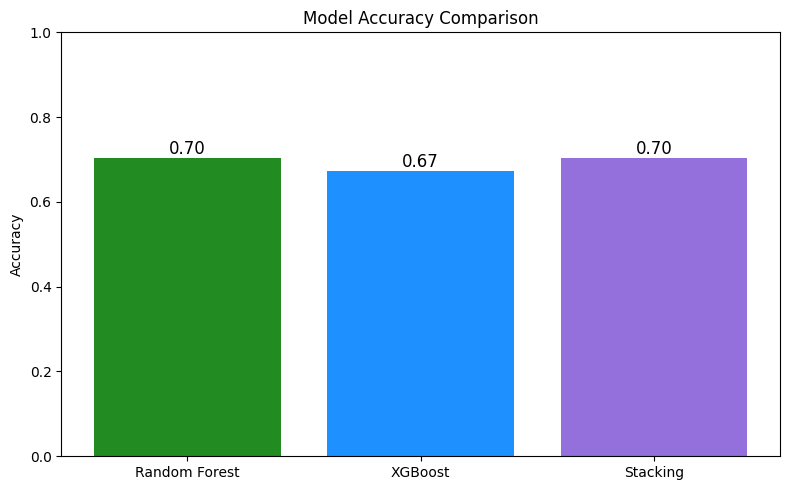

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores
model_names = ['Random Forest', 'XGBoost', 'Stacking']
accuracies = [rf_acc, xgb_acc, stack_acc]

# Bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, accuracies, color=['forestgreen', 'dodgerblue', 'mediumpurple'])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")

# Add accuracy labels on top
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{acc:.2f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
# Combine results for comparison
comparison = X_test.copy()
comparison['actual'] = le.inverse_transform(y_test)
comparison['RF'] = rf_pred_quality
comparison['XGB'] = xgb_pred_quality
comparison['Stacked'] = stack_pred_quality

# Display first few rows
comparison.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,actual,RF,XGB,Stacked
158,6.8,0.61,0.04,1.5,0.057,5.0,10.0,0.99525,3.42,0.60,9.500000,5,5,5,5
1081,6.9,0.84,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.233333,6,6,6,6
291,7.0,0.58,0.12,1.9,0.091,34.0,124.0,0.99560,3.44,0.48,10.500000,5,5,5,5
538,7.8,0.48,0.68,1.7,0.415,14.0,32.0,0.99656,3.09,1.06,9.100000,6,5,5,5
367,12.5,0.60,0.49,4.3,0.100,5.0,14.0,1.00100,3.25,0.74,11.900000,6,5,5,6
